In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("framingham.csv")
data = data.drop("education", axis = 1)
data.shape

(4238, 15)

## Data - Preprocessing

In [3]:
# drop the instances that have at least one attribute with null value

count_nulls = 0
for index, nulls_in_row in enumerate(data.isnull().sum(axis = 1)):
    if nulls_in_row:
        data = data.drop(index)
        count_nulls += 1
data = data.reset_index(drop = True)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# split data into train test and test set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)


## Logistic Regession with Sklearn

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 10000)
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)

comparison = np.equal(y_predict, y_test)
print("Accuracy = {}".format(np.sum(comparison)* 1./len(y_predict)))

Accuracy = 0.844


## Logistic Regression from Scratch

In [23]:
class LogisticRegression_from_Scratch():
    def __init__(self, max_iter, learning_rate):
        self.max_iter = max_iter
        self.w = None
        self.learning_rate = learning_rate
        self.bias = 0
    
    def sigmoid(self, instance, w, bias):
        return 1./(1 + np.exp(-w@instance.T - bias))
    
    def compute_RSS(self, X_train, y_train, w):
        RSS = 0
        for index, instance in enumerate(X_train):
            prob = self.sigmoid(instance, w, self.bias)
            if y_train[index]:
                RSS -= np.log(prob)
            else:
                RSS -= np.log(1 - prob)
        return RSS* 1./len(X_train)
    
    def fit(self, X_train, y_train):
        np.random.seed(42)
        self.w = np.random.random(X_train.shape[1])
        loss_history = []
        
        # stop condition
        epsilon, RSS = 1e-8, 0
        
        # using gradient descent to optimize w
        for epoch in range(self.max_iter):
            sigmoid = self.sigmoid(X_train, self.w, self.bias)
            grad = (sigmoid - y_train)@X_train
            grad_bias = np.sum(sigmoid - y_train)
            
            self.w -= 1./len(X_train)*self.learning_rate* grad
            self.bias -= 1./len(X_train)*self.learning_rate* grad_bias
            
            new_RSS = self.compute_RSS(X_train, y_train, self.w)
            if abs(new_RSS - RSS) < epsilon:
                break
            
            loss_history.append(new_RSS)
            RSS = new_RSS
            if epoch % 10 == 0:
                print("Loss after epoch {} is {}.".format(epoch + 1, self.compute_RSS(X_train, y_train, self.w)))
        
        return self.w, loss_history
    
    def predict(self, X_test):
        y_predict = []
        for instance in X_test:
            prob = self.sigmoid(instance, self.w, self.bias)
            if prob > 0.5:
                y_predict.append(1)
            else:
                y_predict.append(0)
        return y_predict

In [24]:
LR = LogisticRegression_from_Scratch(max_iter = 1000, learning_rate = 0.5)
w, loss_history = LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
comparison = np.equal(y_pred, y_test)
print("Accuracy = {}".format(np.sum(comparison) *1./len(comparison)))

Loss after epoch 1 is 0.9701031303205719.
Loss after epoch 11 is 0.4612194825692546.
Loss after epoch 21 is 0.3917540001145006.
Loss after epoch 31 is 0.3798738994841775.
Loss after epoch 41 is 0.3761916986440101.
Loss after epoch 51 is 0.37470287689395915.
Loss after epoch 61 is 0.37400867919485425.
Loss after epoch 71 is 0.373649642048708.
Loss after epoch 81 is 0.37344767951213076.
Loss after epoch 91 is 0.37332586912826804.
Loss after epoch 101 is 0.3732480608338209.
Loss after epoch 111 is 0.3731960067256791.
Loss after epoch 121 is 0.37315989228132.
Loss after epoch 131 is 0.37313412594663.
Loss after epoch 141 is 0.37311535048162237.
Loss after epoch 151 is 0.37310145259780414.
Loss after epoch 161 is 0.37309104551150174.
Loss after epoch 171 is 0.3730831862225969.
Loss after epoch 181 is 0.3730772143107049.
Loss after epoch 191 is 0.3730726561543946.
Loss after epoch 201 is 0.3730691657192384.
Loss after epoch 211 is 0.373066486552022.
Loss after epoch 221 is 0.3730644265291156

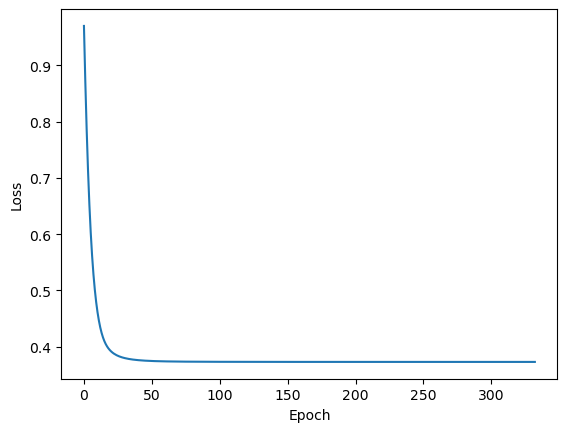

In [27]:
plt.plot(loss_history);
plt.xlabel("Epoch");
plt.ylabel("Loss");